# Title: Yelp Star Rating Prediction Spring 2025 Data Science Project

**Contributors: Tom Mitchell, Jason Liu, Kevin Zhang, Ethan Yen, Vijay Jayasuriya**

Tom worked to analyze the results of our project, describing trends discovered by our model. He also used these results to create visualizations, allowing for easy interpretation of our model's findings.

Jason performed the data cleaning tasks associated with remedying the various inconsistencies within dataset. Using various methods of filtering, imputation, and standardization, he cleaned different features to ready them for model training.

Kevin used data exploration in order to make the final choice of algorithms with which to train our model. He also did data preperations after cleaning which readied them for use in training our chosen models.

Ethan worked to train our machine learning model. He trained decision trees and random forests on the cleaned data to minimize error in predicting unseen data.

Vijay created the final tutorial report. He created the final website, wrote prose to describe project contents, and formatted the report to match requirements

## 1. Introduction:

In this project, we will be analyzing data from businesses in America. We will use this data in our attempt to predict the 'star' Yelp rating of different businesses based on their select features. In order to accomplish this task, we will train a machine learning model to discover underlying patterns within our data, hopefully allowing us to generalize in predicting the star ratings of unseen businesses. In training our model, we aim to determine which features have the strongest positive correlation with stars. In a digital world where user metrics like stars are so deterministic of a business's profitability, such information could be extremely useful to entrepreneurs hoping to maximize the online reception to their ventures.

### Goals:
1. Identify features most predictive of Yelp star ratings

2. Train model to predict stars of unseen businesses with low error

## 2. Data Curation

*We'll be using a dataset directly provided by Yelp in training our model. This Yelp Academic Business Dataset contains various features for each of the business's within Yelp's network. Features of the dataset contain locational data like city and address, provided service data like parking and delivery booleans, and finally rating data like stars and review count.*

### 2.1 Data Collection

In [69]:
import pandas as pd
import numpy as np
import ast

**Converting JSON into a dataframe and csv**

In [70]:
# Filepath for the json version of the dataset
json_filepath = "yelp_academic_dataset_business.json"

# Reading the JSON file (weird since each line is a separate JSON object)
df = pd.read_json(json_filepath, lines=True)

# Normalizing the nested JSON parts and readding them as multiple columns
df_attributes = pd.json_normalize(df["attributes"])
df_hours = pd.json_normalize(df["hours"])
df = df.drop(["attributes", "hours"], axis=1)
df = pd.concat([df, df_attributes, df_hours], axis=1)

# Saving the dataframe to a csv file
df.to_csv("temp.csv")

**General Features of the Dataset**

Printing out the dimensions, attributes and their types, and first rows of the dataframe. The issues with the columns mentioned above can be seen here.

In [71]:
print(df.shape)
print(df.dtypes)
df.head()

(100000, 58)
business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
is_open                         int64
categories                     object
ByAppointmentOnly              object
BusinessAcceptsCreditCards     object
BikeParking                    object
RestaurantsPriceRange2         object
CoatCheck                      object
RestaurantsTakeOut             object
RestaurantsDelivery            object
Caters                         object
WiFi                           object
BusinessParking                object
WheelchairAccessible           object
HappyHour                      object
OutdoorSeating                 object
HasTV                          object

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0


### 2.2 Data Cleaning
*Many of the features in the default dataset contain missing values, discrepancies, and variation which will prevent us from training an accurate model.Consequently, we must clean and prepare the data before it will be useable*

 First, let us clean the data by columns. the **is_open** column tells users if the location is closed permanently. We should only analyze the businesses that are still in operation.

In [72]:
df = df[df["is_open"] == 1]
df.drop("is_open", axis=1, inplace=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


After normalizing the **attributes** and **hours** features, the dataframe gained a significant number of columns (one for each possible attribute and one for each day of the week).

We'll handle the attribute columns first. Let's start with the **ByAppointmentOnly** column.

In [73]:
df["ByAppointmentOnly"].unique()

array([nan, 'False', 'True', 'None'], dtype=object)

We will assume all null values mean it is not by appointment only. This pattern of values is very common in this dataframe, so we will first look for columns with this pattern, and default missing values to False.

In [74]:
pattern = set(df["ByAppointmentOnly"].unique())
matching = []
for col_name in df.columns:
    if set(df[col_name].unique()).issubset(pattern):
        matching.append(col_name)

Now we will replace all null values with False.

In [75]:
mapping = {
    "False" : False,
    "None"  : False,
    "True"  : True
}
for col in matching:
    df[col] = df[col].map(mapping)
    df[col].fillna(False, inplace=True)

/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/2334224800.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(False, inplace=True)
/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/2334224800.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(False

We proceed looking for problematic columns.

In [76]:
attribute_cols = df.columns[11:50]
remaining = [x for x in attribute_cols if x not in matching]
remaining

['RestaurantsPriceRange2',
 'WiFi',
 'BusinessParking',
 'Alcohol',
 'RestaurantsAttire',
 'Ambience',
 'NoiseLevel',
 'GoodForMeal',
 'Smoking',
 'Music',
 'BestNights',
 'BYOBCorkage',
 'HairSpecializesIn',
 'AgesAllowed',
 'DietaryRestrictions']

In [77]:
df["RestaurantsPriceRange2"].unique()

array([nan, '1', '2', '3', '4', 'None'], dtype=object)

This column tells us how expensive a restaurant is on a scale from 1-4. We are simply going to fill missing data with the average pricing.

In [78]:
price_mapping = {
    "1" : 1,
    "2" : 2,
    "3" : 3,
    "4" : 4
}

df["RestaurantsPriceRange2"] = df["RestaurantsPriceRange2"].map(price_mapping)
df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
mean = df["RestaurantsPriceRange2"].mean()
df["RestaurantsPriceRange2"].fillna(mean, inplace=True)

remaining.remove("RestaurantsPriceRange2")

/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/1404852848.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/1404852848.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [79]:
df["WiFi"].unique()

array([nan, "u'free'", "u'no'", "'free'", "'no'", 'None', "u'paid'",
       "'paid'"], dtype=object)

Let's assume that null values for the **WiFi** column means the venue does not have wifi. Additionally, after research, the *"u"* entries were simply data entered when Yelp used Python 2. We will clean this to only have values of: none, free, paid. There are also *"None"* entries throughout, which we will replace with *"none"*. Additionally, this pattern runs for multiple columns.

In [80]:
def clean_entry(x):
    if isinstance(x, str):
        if (x.startswith("u'") and x.endswith("'")) or (x.startswith('u"') and x.endswith('"')):
            return x[2:-1]
        elif (x.startswith("'") and x.endswith("'")) or (x.startswith('"') and x.endswith('"')):
            return x[1:-1]
        elif x == "None":
            return "none"
    return x

pattern = ["WiFi", "Alcohol", "RestaurantsAttire", "NoiseLevel", "Smoking", "BYOBCorkage", "AgesAllowed"]

for col in pattern:
    df[col] = df[col].apply(clean_entry)
    df[col] = df[col].fillna("none")

rem = [x for x in remaining if x not in pattern]
rem

['BusinessParking',
 'Ambience',
 'GoodForMeal',
 'Music',
 'BestNights',
 'HairSpecializesIn',
 'DietaryRestrictions']

In [81]:
df["BusinessParking"].unique()

array([nan,
       "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",
       'None',
       "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}",
       "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': True, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': False, u'street': False, u'lot': True, u'validated': False}",
       "{u'valet': False, u'gara

We will clean this by editing the data so that each entry only includes the type parking it has, and null values will be assumed to have zero parking. The rest of the columns follow this format, so we will clean them together.

In [82]:
def clean_boolean_keys(x):
    x = str(x)
    try:
        parsed = ast.literal_eval(x)
    except Exception:
        return "none"
    
    if not isinstance(parsed, dict):
        return "none"
    
    true_keys = [key for key, value in parsed.items() if value is True]
    return " ".join(true_keys) if true_keys else "none"

for col in rem:
    df[col] = df[col].apply(clean_boolean_keys)

df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


Now let us clean the hours columns. 

In [83]:
def format_time(time):
        hour, minute = time.split(':')
        return f"{int(hour):02d}:{int(minute):02d}"

def convert_hours(x):
    if pd.isna(x) or x == "0:0-0:0":
        return "none"
    
    open, close = x.split('-')
    
    return (format_time(open), format_time(close))

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for day in days:
    df[day] = df[day].apply(convert_hours)
     
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,none,"(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 14:00)",none
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,"(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 21:00)","(07:00, 21:00)","(07:00, 21:00)"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,none,none,"(14:00, 22:00)","(16:00, 22:00)","(12:00, 22:00)","(12:00, 22:00)","(12:00, 18:00)"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,none,"(06:00, 22:00)","(06:00, 22:00)","(06:00, 22:00)","(09:00, 00:00)","(09:00, 22:00)","(08:00, 22:00)"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,none,"(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(12:00, 18:00)"


## 3. Exploratory Data Analysis and Visualization (checkpoint 2)

### 3.1 Rating by Reviews

To begin exploring our data visually, we'll create a box plot depicting the distribution of stars by number of reviews (using bins to group businesses into discrete ranges of reviews)

/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/3989136766.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rc_bin', y='stars', data=df, ax=plot, palette='viridis')
/var/folders/r5/nst207ms30jfypntgw69z_kw0000gn/T/ipykernel_62124/3989136766.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('rc_bin')['stars'].mean()


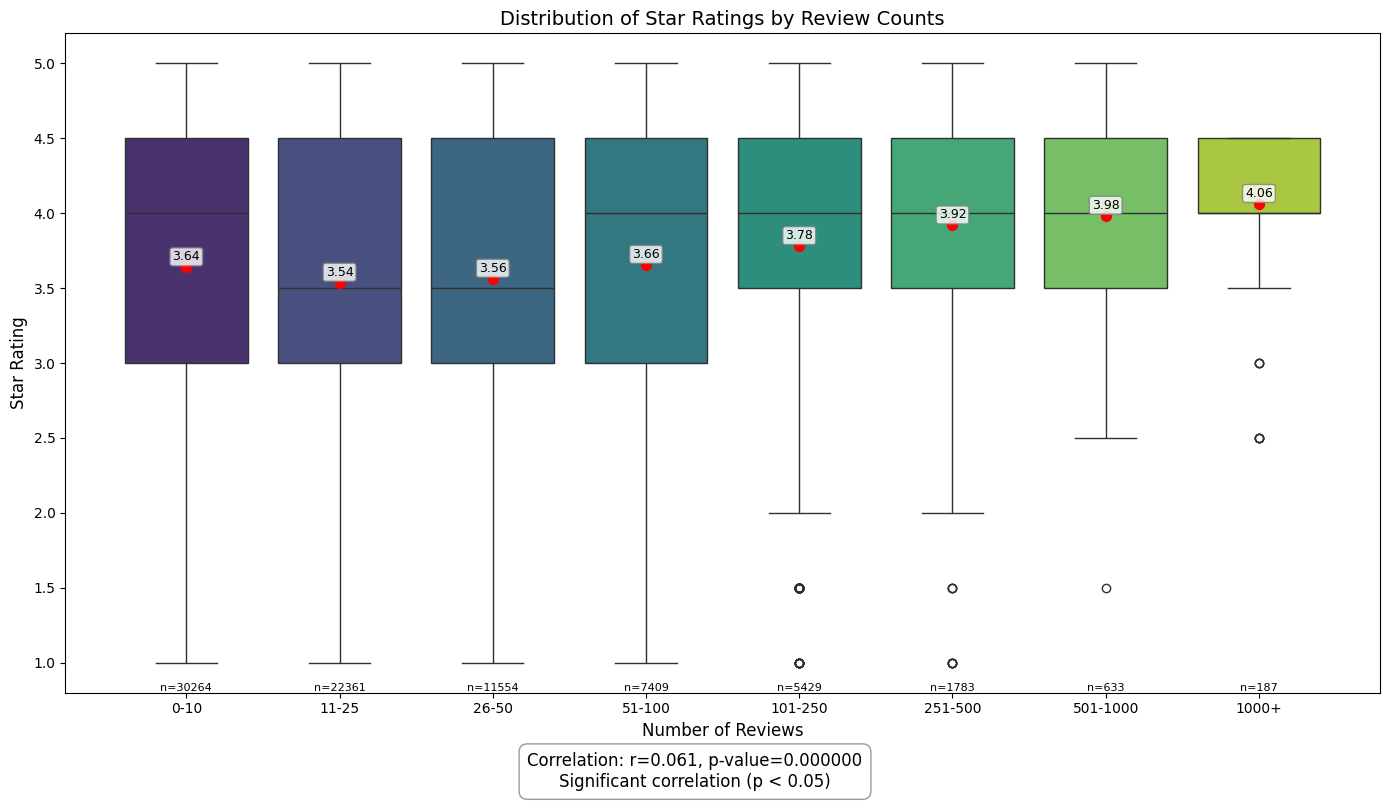

Correlation coefficient: 0.061
p-value: 0.000000
Interpretation: Significant correlation (p < 0.05)


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels

corr, p_value = stats.pearsonr(df['review_count'], df['stars'])

bins = [0, 10, 25, 50, 100, 250, 500, 1000, np.inf]
labels = ['0-10', '11-25', '26-50', '51-100', '101-250', '251-500', '501-1000', '1000+']
df['rc_bin'] = pd.cut(df['review_count'], bins=bins, labels=labels)

fig, plot = plt.subplots(figsize=(14, 8))

sns.boxplot(x='rc_bin', y='stars', data=df, ax=plot, palette='viridis')
plot.set_xlabel('Number of Reviews', fontsize=12)
plot.set_ylabel('Star Rating', fontsize=12)
plot.set_title('Distribution of Star Ratings by Review Counts', fontsize=14)

means = df.groupby('rc_bin')['stars'].mean()
for i, mean_val in enumerate(means):
    plot.scatter(i, mean_val, color='red', s=50, zorder=3)
    plot.annotate(f'{mean_val:.2f}', (i, mean_val), 
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.8))

counts = df['rc_bin'].value_counts().sort_index()
for i, count in enumerate(counts):
    plot.annotate(f'n={count}', (i, df['stars'].min()), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=8)

if p_value < 0.05:
    correlation = "Significant correlation (p < 0.05)"
else:
    correlation = "No significant correlation (p ≥ 0.05)"

fig.text(0.5, 0.01, 
         f"Correlation: r={corr:.3f}, p-value={p_value:.6f}\n" + f"{correlation}", 
         ha='center', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.show()

print(f"Correlation coefficient: {corr:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Interpretation: {correlation}")

### 3.2 Rating by State

*Next, we'll analyze the geographic influence on ratings. We'll create a bar chart depicting the average star ratings of businesses in the 10 states with the most businesses. We'll use this to conduct and ANOVA test to determine if there is significant difference between states in their average ratings*

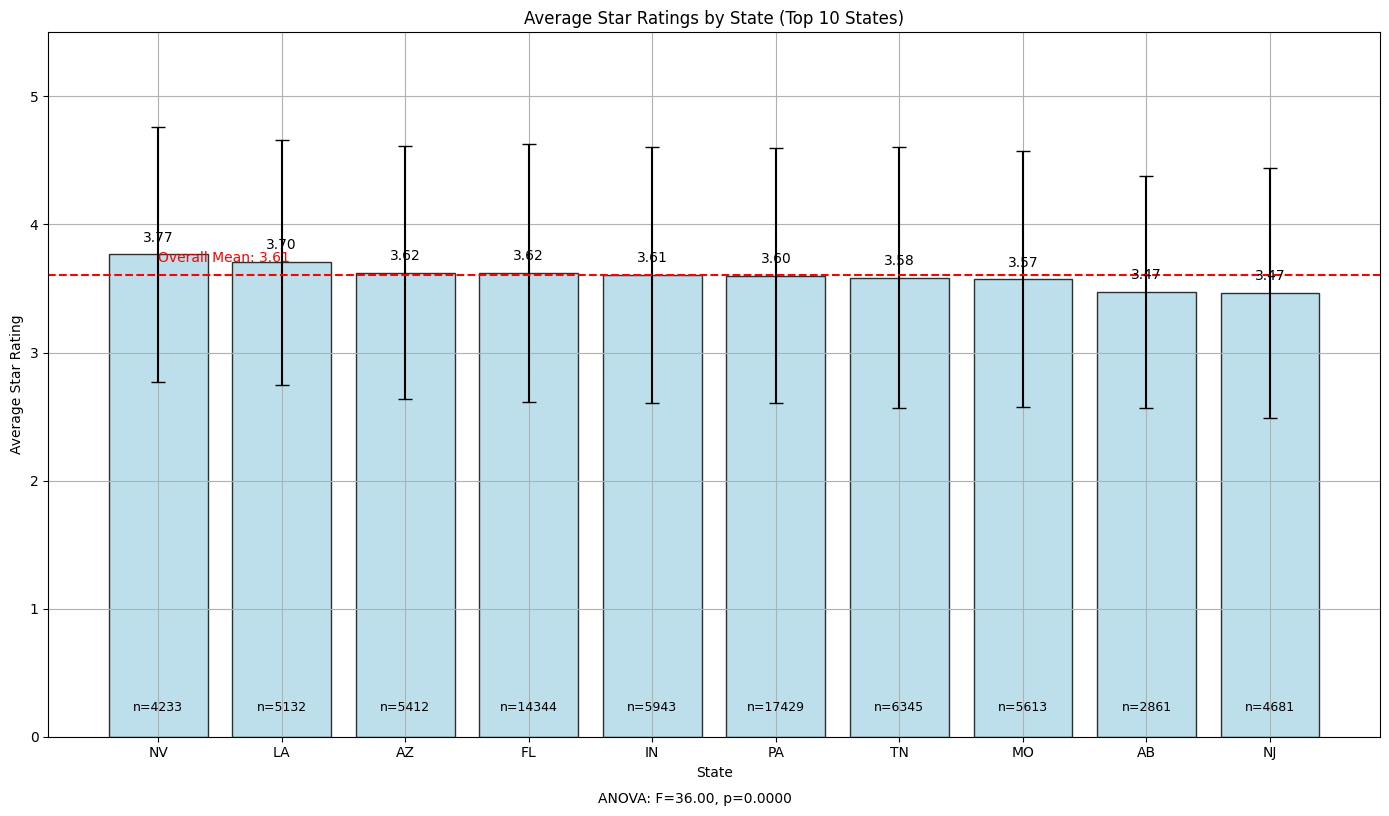

ANOVA F-statistic: 35.995
p-value: 0.000000
There are significant differences between states

Tukey's HSD Post-hoc Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AB     AZ   0.1537    0.0  0.0812  0.2262   True
    AB     FL   0.1526    0.0  0.0884  0.2169   True
    AB     IN   0.1351    0.0  0.0637  0.2065   True
    AB     LA   0.2343    0.0  0.1611  0.3075   True
    AB     MO   0.1012 0.0004  0.0292  0.1733   True
    AB     NJ  -0.0039    1.0 -0.0784  0.0705  False
    AB     NV   0.2955    0.0  0.2196  0.3714   True
    AB     PA    0.129    0.0  0.0657  0.1923   True
    AB     TN   0.1129    0.0  0.0423  0.1836   True
    AZ     FL  -0.0011    1.0 -0.0511   0.049  False
    AZ     IN  -0.0186 0.9925 -0.0775  0.0404  False
    AZ     LA   0.0806 0.0012  0.0195  0.1417   True
    AZ     MO  -0.0525 0.1443 -0.1122  0.0073  False
    AZ     NJ  -0.1576    0.0 -

In [85]:
top_states = df['state'].value_counts().head(10).index.tolist()
df_ts = df[df['state'].isin(top_states)]


state_stats = df_ts.groupby('state')['stars'].agg(['mean', 'std', 'count']).reset_index()
state_stats = state_stats.sort_values('mean', ascending=False)

groups = [df_ts[df_ts['state'] == state]['stars'] for state in top_states]
f_stat, p_value = stats.f_oneway(*groups)

fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.bar(
    state_stats['state'], 
    state_stats['mean'], 
    yerr=state_stats['std'], 
    capsize=5, 
    color='lightblue', 
    alpha=0.8,
    edgecolor='black'
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    count = state_stats['count'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.1, 
        f'{height:.2f}',
        ha='center', 
        fontsize=10
    )
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        0.2, 
        f'n={count}',
        ha='center', 
        fontsize=9,
        color='black'
    )

ax.set_xlabel('State')
ax.set_ylabel('Average Star Rating')
ax.set_title('Average Star Ratings by State (Top 10 States)')
ax.set_ylim(0, 5.5)
ax.grid(True)

total_mean = df_ts['stars'].mean()
ax.axhline(y=total_mean, color='red', linestyle='--')
ax.text(0, total_mean+0.1, f'Overall Mean: {total_mean:.2f}', color='red')

result_text = f"ANOVA: F={f_stat:.2f}, p={p_value:.4f}"
plt.figtext(0.5, -0.01, result_text, ha='center')

plt.tight_layout()
plt.show()

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    result_text += "\nSignificant differences between states (p < 0.05)"
    print("There are significant differences between states")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    tukey_data = []
    for state, group in zip(top_states, groups):
        for value in group:
            tukey_data.append([state, value])
    
    tukey_df = pd.DataFrame(tukey_data, columns=['state', 'stars'])
    
    tukey_result = pairwise_tukeyhsd(tukey_df['stars'], tukey_df['state'], alpha=0.05)
    
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey_result)
else:
    result_text += "\nNo significant differences between states (p >= 0.05)"
    


### 3.3 Alcohol Service Proportions by Business Price Range

Next, we will analyze the correlation between business price range and alcohol Service. Since the latter variable is categorial between 'no service', 'full bar', and 'beer and wine', we will use a 100% stacked column chart. We'll conduct a chi-squared test to determine if there is a significant correlation between price range and alcohol service type

Number of restaurants: 23271
Price ranges: [1.         1.76885663 2.         3.         4.        ]
Alcohol options: ['none' 'full_bar' 'beer_and_wine']


<Figure size 1600x800 with 0 Axes>

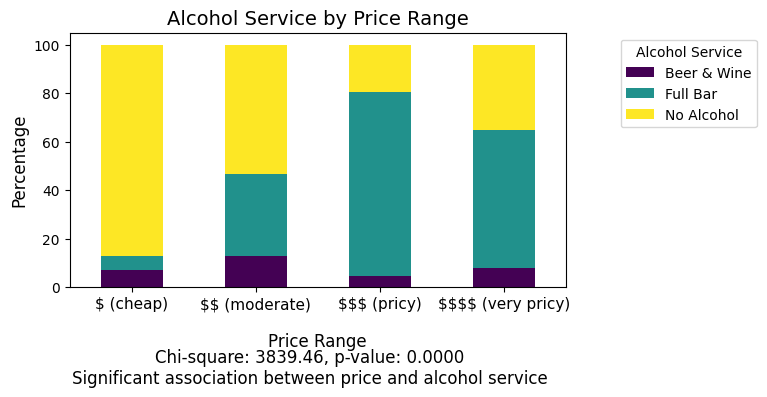

Chi-square: 3839.461
p-value: 0.000000
Degrees of freedom: 6

Contingency Table (Count):
AlcoholService         Beer & Wine  Full Bar  No Alcohol
PriceCategory                                           
$ (cheap)                      651       514        7892
$$ (moderate)                 1708      4605        7233
$$$ (expensive)                 27       448         116
$$$$ (very expensive)            6        44          27


In [86]:
restaurants = df[df['categories'].str.contains('Restaurant', na=False)]

restaurants = restaurants.dropna(subset=['RestaurantsPriceRange2', 'Alcohol'])
        
print(f"Number of restaurants: {len(restaurants)}")
print(f"Price ranges: {restaurants['RestaurantsPriceRange2'].unique()}")
print(f"Alcohol options: {restaurants['Alcohol'].unique()}")
        
restaurants['PriceCategory'] = pd.cut(
    restaurants['RestaurantsPriceRange2'], 
    bins=[0, 1.5, 2.5, 3.5, 4.5],
    labels=['$ (cheap)', '$$ (moderate)', '$$$ (expensive)', '$$$$ (very expensive)']
)

alcohol_map = {
    'none': 'No Alcohol',
    'full_bar': 'Full Bar', 
    'beer_and_wine': 'Beer & Wine'
}
restaurants['AlcoholService'] = restaurants['Alcohol'].map(alcohol_map)
        
restaurants = restaurants.dropna(subset=['PriceCategory', 'AlcoholService'])
        
cont = pd.crosstab(restaurants['PriceCategory'], restaurants['AlcoholService'])
            
chi2, p_value, dof, expected = stats.chi2_contingency(cont)
            
plt.figure(figsize=(16, 8))
            
cont_pct = cont.div(cont.sum(axis=1), axis=0) * 100
ax = cont_pct.plot(kind='bar', stacked=True, colormap='viridis')
            
plt.xlabel('Price Range', fontsize=12, labelpad=15)
plt.ylabel('Percentage', fontsize=12)
plt.title('Alcohol Service by Price Range', fontsize=14)
            
plt.legend(title='Alcohol Service', loc='upper right', bbox_to_anchor=(1.4, 1.0))
            
price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)', '\$\$\$\$ (very pricy)']
plt.xticks(range(len(cont_pct.index)), price_labels, rotation=0, fontsize=11)
            
plt.gca().set_xticklabels(price_labels, ha='center')
            
plt.subplots_adjust(bottom=0.35)
            
res = f"Chi-square: {chi2:.2f}, p-value: {p_value:.4f}"
if p_value < 0.05:
    res += "\nSignificant association between price and alcohol service"
else:
    res += "\nNo significant association between price and alcohol service"
            
plt.figtext(0.5, 0.15, res, ha='center', fontsize=12)
plt.show()
            
print(f"Chi-square: {chi2:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print("\nContingency Table (Count):")
print(cont)

## 4. Primary Data Analysis

### 4.1 Algorithm Choice(s)
In our exploration of the data, we found that several features (state and number of reviews) had significant correlation with stars. Further, since stars have a limited range, we chose to discretize it as an output value such that we can perform classification. Since one of our goals was to determine which features have the strongest predictive power in determining stars, we decided to use decision trees. This algorithm will help us to find the featuers with the highest purity in relation to stars. We can use the features identified as the strongest in accomplish our main goal of training a model which can accurately predict stars of a business. We will use Random Forest Clusters to train this final mode.

### 4.2 Data preperation

We must make some final changes to our data in order to prepare it for our chosen algorithms.

First let's reset the index of the data

In [87]:
df.reset_index(inplace=True)

Now that the data is cleaned, it can be used for any type of model that you guys would like to create. For us, we will be focusing on predicting the number of stars based on certain features.

We will choose all the boolean type features first

In [88]:
bool_features = df.select_dtypes('bool')

Nothing needs to be done about this

Then we'll take all the categorical data where the number of unique values is less than or equal to 5

In [89]:
categorical_features = df.select_dtypes('object')
low_features_mask = categorical_features.nunique() < 5
categorical_features = categorical_features[low_features_mask[low_features_mask].index]

We'll one hot encode these to create columns that are binary data as well.

In [90]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(categorical_features)

encoded_feature_names = []
for i, col in enumerate(categorical_features):
    for category in encoder.categories_[i]:
        encoded_feature_names.append(f"{col}_{category}")

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

Now let's see our continuous data. We'll only have the review_count and RestaurantsPriceRange2

In [91]:
continuous_features = df[['review_count', 'RestaurantsPriceRange2']]

Let's standardize them

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_features)
scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in continuous_features.columns])

Now lets concatenate all the prepared data into X

In [93]:
X = pd.concat([bool_features, encoded_df, scaled_df], axis=1)

And we have our target y: 'stars' by setting binary classes of 'Good' being star ratings above a threshold and 'Bad' being star ratings below that threshold. How do we choose this threshold? We try all of them (star ratings only range from 0-5)

In [94]:
thresh = 5.0

while thresh > 0:
    y = df['stars'].apply(lambda x: 'Good' if x > thresh else 'Bad')
    print(f"Threshold: {thresh}")
    print(f"Distribution: {y.value_counts()}")
    print()
    
    thresh -= 0.5


Threshold: 5.0
Distribution: stars
Bad    79620
Name: count, dtype: int64

Threshold: 4.5
Distribution: stars
Bad     69991
Good     9629
Name: count, dtype: int64

Threshold: 4.0
Distribution: stars
Bad     54979
Good    24641
Name: count, dtype: int64

Threshold: 3.5
Distribution: stars
Good    40901
Bad     38719
Name: count, dtype: int64

Threshold: 3.0
Distribution: stars
Good    54071
Bad     25549
Name: count, dtype: int64

Threshold: 2.5
Distribution: stars
Good    63209
Bad     16411
Name: count, dtype: int64

Threshold: 2.0
Distribution: stars
Good    70542
Bad      9078
Name: count, dtype: int64

Threshold: 1.5
Distribution: stars
Good    75729
Bad      3891
Name: count, dtype: int64

Threshold: 1.0
Distribution: stars
Good    78495
Bad      1125
Name: count, dtype: int64

Threshold: 0.5
Distribution: stars
Good    79620
Name: count, dtype: int64



By inspection, we see that a threshold of 3.5 gives us evenly distributed data of Good and Bad star ratings. We'll initiate it:

In [95]:
y = df['stars'].apply(lambda x: 'Good' if x > 3.5 else 'Bad')

Let's split the data now.

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Decision Tree Classifier

There are so many features that seem good to use just by inspection because they all seem to relate to how well a business can do (stars rating). That's why we'll use a decision tree to extract the most important feature. A decision tree is good for our data since a lot of our data is true/false and the one hot encoded data essentially is binary as well. There are two hyperparameters that we want to test if they'll change anything: criterion and max_depth.

Best Max Depth for gini: 10 -- Best Accuracy: 0.6264129615674454
Best Max Depth for entropy: 11 -- Best Accuracy: 0.625408188897262
Best Max Depth for log_loss: 10 -- Best Accuracy: 0.625408188897262


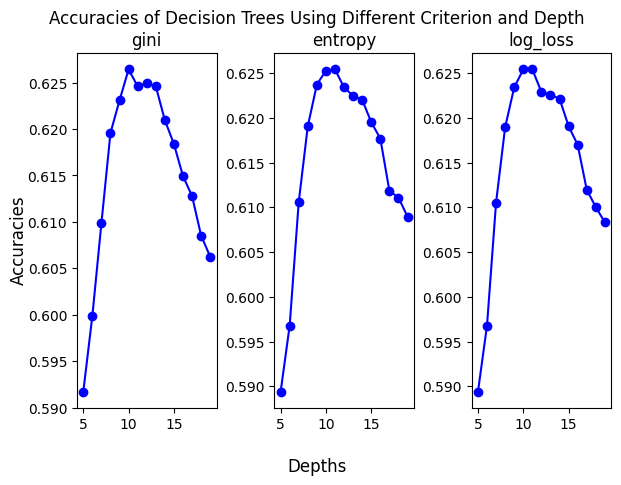

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

fig, ax = plt.subplots(1, 3, )
fig.suptitle('Accuracies of Decision Trees Using Different Criterion and Depth')
fig.supxlabel('Depths')
fig.supylabel('Accuracies')
fig.tight_layout()

for i, criterion in enumerate(['gini', 'entropy', 'log_loss']):
    ax[i].set_title(criterion)
    depths = []
    accuracies = []
    for depth in range(5,20):

        dtc = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
        dtc.fit(X_train, y_train)

        y_pred = dtc.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        depths.append(depth)
        accuracies.append(accuracy)

    ax[i].plot(depths, accuracies, color='b', marker='o', linestyle='-')
    print(f"Best Max Depth for {criterion}: {depths[np.argmax(accuracies)]} -- Best Accuracy: {max(accuracies)}")

plt.show()

We see that the best max depth for all three criterion is around 10. As for the criterion, it doesn't seem like any one makes a difference so we'll choose 'entropy' just because we've learned that in class. Now we will make the decision tree with those actual hyperparameters.

In [98]:
criterion = 'entropy'
max_depth = 10

dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

# Change output format to dict because we'll use it later
report_tree = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

         Bad       0.61      0.64      0.62      7764
        Good       0.64      0.62      0.63      8160

    accuracy                           0.63     15924
   macro avg       0.63      0.63      0.63     15924
weighted avg       0.63      0.63      0.63     15924



This is our 'refined' decision tree classifier. As we said before, we will extract the feature importances and sort them to see which ones are the most important. We'll visualize the importance of each feature as well.

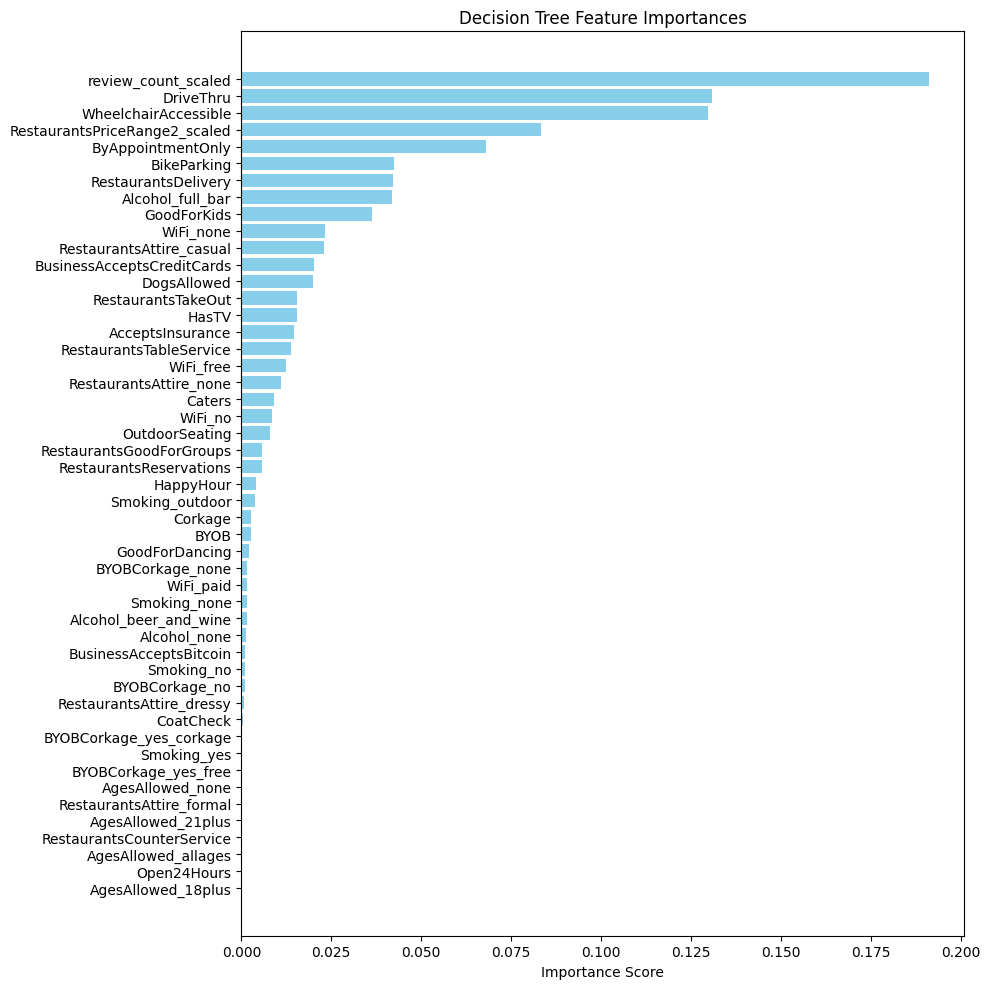

In [99]:
# If X_train is a DataFrame, use its column names

feature_names = X_train.columns

# Get feature importances and sort them in descending order
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a sorted DataFrame for easier inspection
importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': importances[indices]
})

# Plot
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

The top of the graph indicates the most important features and the bottom indicates the least.

### 4.4 Random Forest Classification

What's better than a decision tree. A forest of them. That's what random forest does. We'll use this type of model now to first see how many features we should select. We'll keep the same hyperparameters as the decision tree.

In [100]:
from sklearn.ensemble import RandomForestClassifier

num_features_list = []
f1_bad_list = []
f1_good_list = []
accuracy_list = []

for i in range(6, len(importance_df), 5):
    rfc = RandomForestClassifier(criterion=criterion, max_depth=max_depth)
    rfc.fit(X_train[importance_df['Feature'][0:i]], y_train)

    y_pred = rfc.predict(X_test[importance_df['Feature'][0:i]])
    report = classification_report(y_test, y_pred, output_dict=True)
    
    num_features_list.append(i)
    f1_bad_list.append(report['Bad']['f1-score'])
    f1_good_list.append(report['Good']['f1-score'])
    accuracy_list.append(report['accuracy'])

We'll plot the model performance based on the number of features selected.

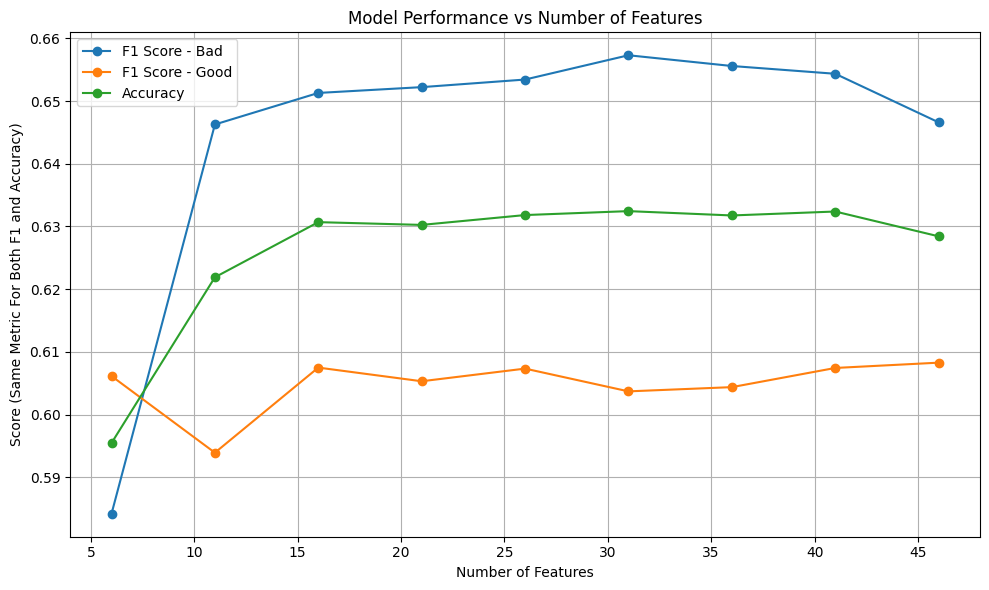

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, f1_bad_list, label='F1 Score - Bad', marker='o')
plt.plot(num_features_list, f1_good_list, label='F1 Score - Good', marker='o')
plt.plot(num_features_list, accuracy_list, label='Accuracy', marker='o')

plt.xlabel('Number of Features')
plt.ylabel('Score (Same Metric For Both F1 and Accuracy)')
plt.title('Model Performance vs Number of Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Results and Visualizations

By inspection, the most amount of features needed with a decently high f1 score for both classes is 36. We choose the most amount of features because we want to incorporate as much information as possible without introducing random data that could hurt the results. Looking at the graph, it seems like the model performance slightly decreases from 36 features to 41 so we choose 36. Note that this means the top 36 important features as decided from the decision tree model before. Again, let's get the actual random forest model with these hyperparameters.

In [102]:
min_features = 36

rfc = RandomForestClassifier(criterion=criterion, max_depth=max_depth)
rfc.fit(X_train[importance_df['Feature'][0:min_features]], y_train)

y_pred = rfc.predict(X_test[importance_df['Feature'][0:min_features]])
report_rf = classification_report(y_test, y_pred)
print("Final Random Forest Model Classification Report:")
print(report_rf)

# Change output format to dict because we'll use it later
report_rf = classification_report(y_test, y_pred, output_dict=True)

Final Random Forest Model Classification Report:
              precision    recall  f1-score   support

         Bad       0.60      0.72      0.66      7764
        Good       0.67      0.55      0.61      8160

    accuracy                           0.63     15924
   macro avg       0.64      0.64      0.63     15924
weighted avg       0.64      0.63      0.63     15924



This is our final 'refined' model that classifies whether a business is good or bad based on the important features.

The results show that the model achieved a precision of 0.60 and a recall of 0.72 for the "Bad" class, resulting in an F1 score of 0.66. This indicates that the model correctly identified 72% of the actual bad businesses, though only 60% of the businesses it predicted as bad were truly bad. For the "Good" class, the model had a higher precision of 0.67 but a lower recall of 0.55, with an F1 score of 0.60. This means it was more accurate when predicting a business as good, but it failed to identify a large portion of the actual good businesses. The overall accuracy of the model was 63%, with both macro and weighted averages for precision, recall, and F1 score hovering around 0.63. These metrics suggest relatively balanced but moderate performance across both classes.

Now we'll visualize the difference between the Decision Tree and Random Forest Model

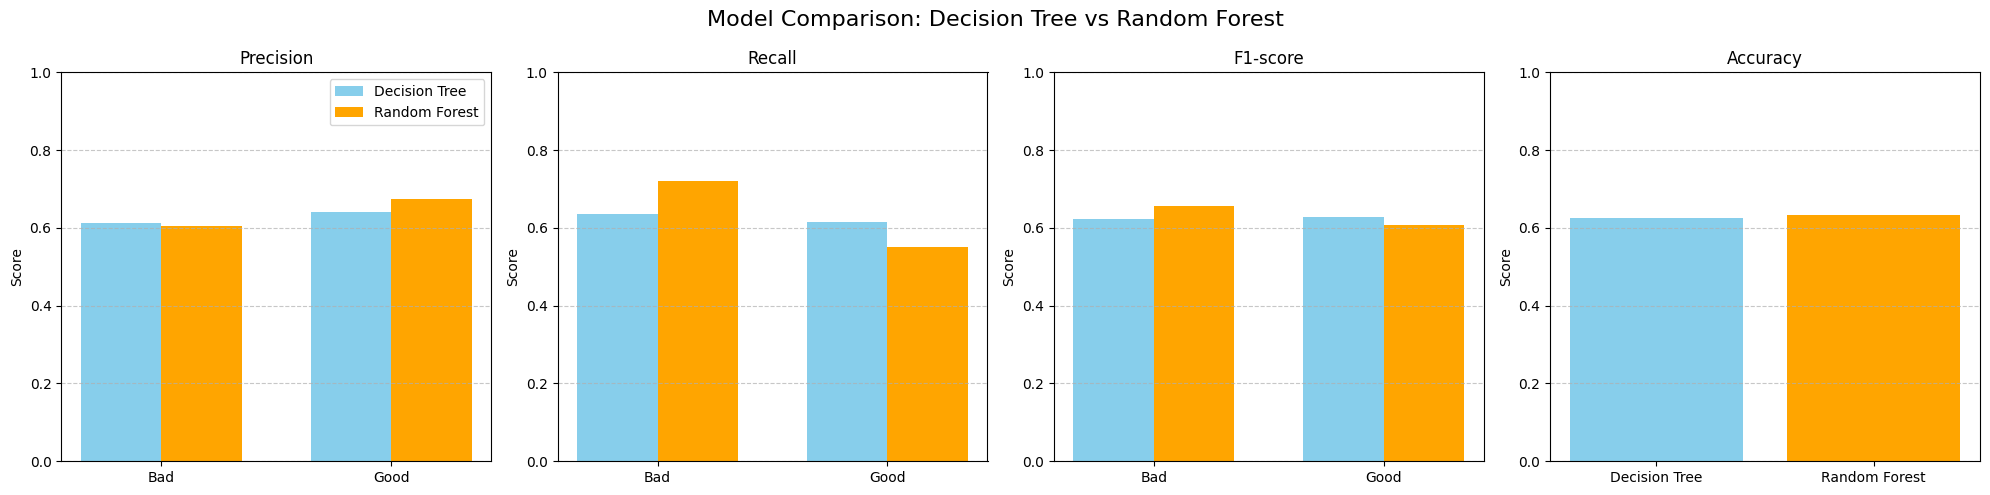

In [103]:
# Classes and metrics
classes = ['Bad', 'Good']
metrics = ['precision', 'recall', 'f1-score']

# Bar width and positioning
x = np.arange(len(classes))
bar_width = 0.35

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 4 subplots including accuracy

# Plot precision, recall, f1-score
for i, metric in enumerate(metrics):
    tree_scores = [report_tree[cls][metric] for cls in classes]
    rf_scores = [report_rf[cls][metric] for cls in classes]

    ax = axes[i]
    ax.bar(x - bar_width/2, tree_scores, width=bar_width, label='Decision Tree', color='skyblue')
    ax.bar(x + bar_width/2, rf_scores, width=bar_width, label='Random Forest', color='orange')

    ax.set_title(metric.capitalize())
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if i == 0:
        ax.legend()

# Plot accuracy as a separate bar chart
ax_acc = axes[3]
acc_tree = report_tree['accuracy']
acc_rf = report_rf['accuracy']
ax_acc.bar(['Decision Tree', 'Random Forest'], [acc_tree, acc_rf], color=['skyblue', 'orange'])
ax_acc.set_title('Accuracy')
ax_acc.set_ylim(0, 1)
ax_acc.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Model Comparison: Decision Tree vs Random Forest', fontsize=16)
plt.ylabel("Score")
plt.tight_layout()
plt.show()

Despite using a more refined feature set and a potentially stronger model (random forest), the performance remained stagnant or slightly skewed compared to the decision tree model. One interesting observation is that the recall with the random forest when classifying 'Bad' went up but went down when classifying 'Good'. This implies that the additional features originally used in the decision tree provided some useful context, and eliminating them based on importance scores may have oversimplified the problem.

## 6. Insights and Conclusions

Based on the results, several insights and conclusions can be drawn about the model's performance. First, the model is slightly better at identifying bad businesses than good ones, as shown by the higher recall for the "Bad" class. This suggests that the model is more sensitive to detecting negative cases, which could be useful in applications where avoiding poor recommendations is a priority. However, the lower recall for the "Good" class indicates that many good businesses are being missed, which could limit the model’s usefulness if the goal is to surface high-quality businesses reliably.

The higher precision for the "Good" class shows that when the model does predict a business as good, it's more likely to be correct. This cautious approach may reduce the number of false positives but comes at the cost of missing many truly good businesses. The overall moderate accuracy and F1 scores indicate that the current feature set and model may not fully capture the patterns that separate good and bad businesses.

Overall, the relatively low F1 scores and accuracy results may suggest potential underfitting, as the model appears to struggle with capturing the underlying patterns in the data, leading to only moderate performance across both classes. We think the cause of this is the limited feature expressiveness, especially since most features are binary. Exploring more expressive models or engineering more complex features could help address this underfitting and lead to improved classification results.